# Feature Engineering

In [1]:
# import the relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read train data and test data
train_data_file = 'dataset/zhengqi_train.txt'
test_data_file = 'dataset/zhengqi_test.txt'

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

In [3]:
# view train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

In [4]:
# view test data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1925 non-null   float64
 1   V1      1925 non-null   float64
 2   V2      1925 non-null   float64
 3   V3      1925 non-null   float64
 4   V4      1925 non-null   float64
 5   V5      1925 non-null   float64
 6   V6      1925 non-null   float64
 7   V7      1925 non-null   float64
 8   V8      1925 non-null   float64
 9   V9      1925 non-null   float64
 10  V10     1925 non-null   float64
 11  V11     1925 non-null   float64
 12  V12     1925 non-null   float64
 13  V13     1925 non-null   float64
 14  V14     1925 non-null   float64
 15  V15     1925 non-null   float64
 16  V16     1925 non-null   float64
 17  V17     1925 non-null   float64
 18  V18     1925 non-null   float64
 19  V19     1925 non-null   float64
 20  V20     1925 non-null   float64
 21  V21     1925 non-null   float64
 22  

## Outlier analysis

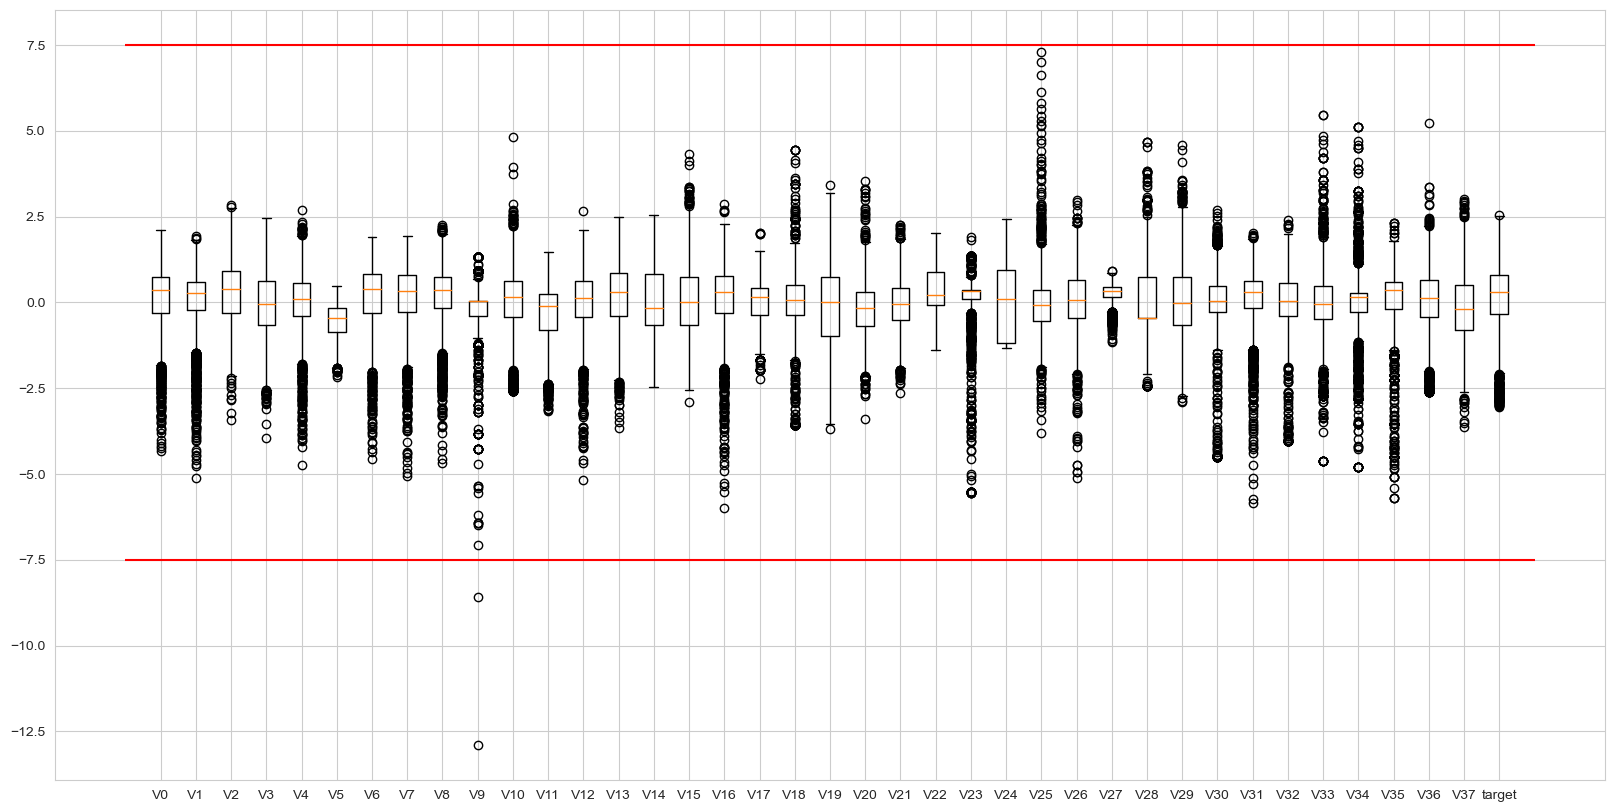

In [5]:
plt.figure(figsize=(20, 10))
plt.boxplot(x=train_data.values, labels=train_data.columns)
plt.hlines([-7.5, 7.5], 0, 40, colors='r')
plt.show()

In [6]:
# dropout V9 outliers
train_data = train_data[train_data['V9'] > -7.5]
test_data = test_data[test_data['V9'] > -7.5]
display(train_data.describe())
display(train_data.describe())

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.00000,...,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000
mean,0.123725,0.056856,0.290340,-0.068364,0.012254,-0.558971,0.183273,0.116274,0.178138,-0.16213,...,0.097019,0.058619,0.127617,0.023626,0.008271,0.006959,0.198513,0.030099,-0.131957,0.127451
std,0.927984,0.941269,0.911231,0.970357,0.888037,0.517871,0.918211,0.955418,0.895552,0.91089,...,1.060824,0.894311,0.873300,0.896509,1.007175,1.003411,0.985058,0.970258,1.015666,0.983144
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-7.07100,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.292000,-0.224250,-0.310000,-0.652750,-0.385000,-0.853000,-0.310000,-0.295000,-0.158750,-0.39000,...,-0.664000,-0.282000,-0.170750,-0.405000,-0.499000,-0.290000,-0.199750,-0.412750,-0.798750,-0.347500
50%,0.359500,0.273000,0.386000,-0.045000,0.109500,-0.466000,0.388500,0.345000,0.362000,0.04200,...,-0.023000,0.054500,0.299500,0.040000,-0.040000,0.160000,0.364000,0.137000,-0.186000,0.314000
75%,0.726000,0.599000,0.918750,0.623500,0.550000,-0.154000,0.831750,0.782750,0.726000,0.04200,...,0.745000,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.643750,0.493000,0.793750
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.33500,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.00000,...,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000
mean,0.123725,0.056856,0.290340,-0.068364,0.012254,-0.558971,0.183273,0.116274,0.178138,-0.16213,...,0.097019,0.058619,0.127617,0.023626,0.008271,0.006959,0.198513,0.030099,-0.131957,0.127451
std,0.927984,0.941269,0.911231,0.970357,0.888037,0.517871,0.918211,0.955418,0.895552,0.91089,...,1.060824,0.894311,0.873300,0.896509,1.007175,1.003411,0.985058,0.970258,1.015666,0.983144
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-7.07100,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.292000,-0.224250,-0.310000,-0.652750,-0.385000,-0.853000,-0.310000,-0.295000,-0.158750,-0.39000,...,-0.664000,-0.282000,-0.170750,-0.405000,-0.499000,-0.290000,-0.199750,-0.412750,-0.798750,-0.347500
50%,0.359500,0.273000,0.386000,-0.045000,0.109500,-0.466000,0.388500,0.345000,0.362000,0.04200,...,-0.023000,0.054500,0.299500,0.040000,-0.040000,0.160000,0.364000,0.137000,-0.186000,0.314000
75%,0.726000,0.599000,0.918750,0.623500,0.550000,-0.154000,0.831750,0.782750,0.726000,0.04200,...,0.745000,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.643750,0.493000,0.793750
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.33500,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


## Normalization of maximum and minimum values

In [7]:
from sklearn.preprocessing import MinMaxScaler

features_col = [col for col in train_data.columns if col not in ['target']]

train_data_scaler = MinMaxScaler().fit_transform(train_data[features_col])
test_data_scaler = MinMaxScaler().fit_transform(test_data[features_col])

train_data_scaler = pd.DataFrame(train_data_scaler)
test_data_scaler = pd.DataFrame(test_data_scaler)

train_data_scaler.columns = features_col
test_data_scaler.columns = features_col

train_data_scaler['target'] = train_data['target']

In [8]:
train_data_scaler

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.759139,0.729830,0.524488,0.680337,0.698964,0.479596,0.427136,0.385874,0.613522,0.589698,...,0.406834,0.641467,0.666159,0.679280,0.000000,0.000000,0.074074,0.000000,0.018401,0.175
1,0.821406,0.789631,0.557939,0.705130,0.664244,0.482591,0.465152,0.385874,0.724232,0.589698,...,0.371596,0.643552,0.748349,0.721619,0.374950,0.499949,0.755580,0.289702,0.437406,0.676
2,0.828377,0.808239,0.584987,0.674567,0.653210,0.518532,0.495905,0.385874,0.733458,0.589698,...,0.387480,0.676487,0.779472,0.610577,0.374950,0.499949,0.755580,0.429901,0.458673,0.633
3,0.785006,0.779830,0.592670,0.642601,0.718746,0.562711,0.521712,0.425208,0.734467,0.589698,...,0.390683,0.684269,0.779726,0.722084,0.374950,0.477220,0.755580,0.374841,0.530618,0.206
4,0.777416,0.818182,0.588988,0.649462,0.683488,0.646949,0.541338,0.425208,0.721638,0.589698,...,0.413107,0.776126,0.785950,0.693393,0.374950,0.462067,0.755580,0.296712,0.543288,0.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,0.700898,0.724006,0.525288,0.641977,0.718880,0.737551,0.824138,0.808498,0.672625,0.948727,...,0.405766,0.597415,0.847053,0.601737,0.482957,0.481059,0.666667,0.405812,0.650980,0.892
2882,0.750000,0.806676,0.594750,0.645408,0.709460,0.728192,0.822902,0.808498,0.753784,0.948727,...,0.427523,0.586437,0.803354,0.580490,0.534086,0.534094,0.666667,0.254015,0.490196,0.812
2883,0.610440,0.625142,0.469750,0.629970,0.656439,0.829652,0.808376,0.812805,0.558455,0.948727,...,0.427523,0.601445,0.778328,0.714175,0.534086,0.534094,0.666667,0.453607,0.660332,0.235
2884,0.637546,0.687500,0.492318,0.609231,0.698560,0.764508,0.793695,0.808355,0.590457,0.948727,...,0.417512,0.773763,0.737805,0.787221,0.545482,0.545409,0.681506,0.294035,0.631222,1.042


In [9]:
test_data_scaler

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.749494,0.771293,0.651469,0.548903,0.564070,0.290055,0.863731,0.879897,0.744420,0.899181,...,0.280073,0.452622,0.596913,0.838922,0.771554,0.511395,0.482877,0.796568,0.373194,0.586461
1,0.717674,0.785620,0.647937,0.548903,0.536718,0.222606,0.854953,0.871634,0.700602,0.899181,...,0.280919,0.452622,0.662699,0.862810,0.724984,0.463040,0.461562,0.818212,0.423112,0.541856
2,0.672259,0.713197,0.637663,0.565062,0.517880,0.283379,0.854675,0.871634,0.688792,0.899181,...,0.278804,0.370745,0.602668,0.865330,0.738043,0.460166,0.460147,0.818212,0.545072,0.614889
3,0.711021,0.759989,0.646011,0.565913,0.504257,0.302947,0.853142,0.873201,0.716783,0.899181,...,0.279086,0.370745,0.721161,0.858536,0.802234,0.454518,0.454490,0.818212,0.355092,0.586933
4,0.739659,0.777603,0.720983,0.565913,0.520221,0.295580,0.843946,0.872204,0.733908,0.899181,...,0.278804,0.301196,0.627518,0.884067,0.666772,0.454518,0.454490,0.818212,0.451271,0.447463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,0.499277,0.517219,0.190560,0.481715,0.564283,0.585405,0.110771,0.041886,0.234440,0.344561,...,0.417431,0.475437,0.002485,0.208744,0.001101,0.340864,0.397717,0.584390,0.008045,0.619287
1921,0.306046,0.267613,0.106438,0.375914,0.376330,0.586096,0.100599,0.074370,0.196764,0.596608,...,0.280496,0.682613,0.509286,0.000000,0.532253,0.340864,0.397717,0.584390,0.008045,0.716350
1922,0.318050,0.252892,0.141435,0.485457,0.388357,0.526934,0.198690,0.186636,0.101925,0.394971,...,0.280355,0.545538,0.605807,0.173899,0.681561,0.275069,0.327407,0.649322,0.011702,0.778703
1923,0.311397,0.242114,0.162466,0.438340,0.388570,0.525783,0.269333,0.258726,0.156372,0.445380,...,0.280355,0.502484,0.731494,0.266272,0.745752,0.295482,0.335185,0.649322,0.010788,0.750275


## View the data distribution

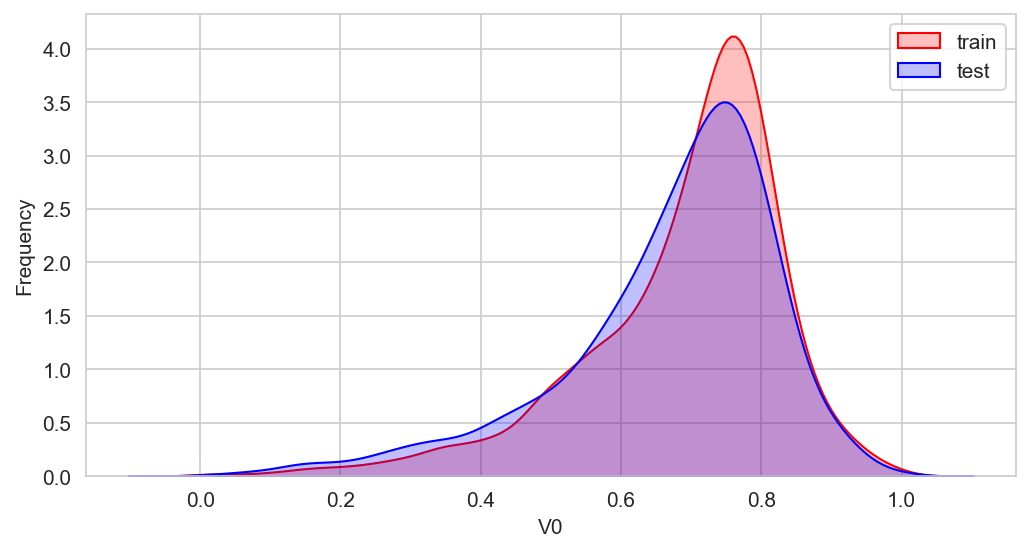

In [10]:
# 4. KDE Distribution
plt.figure(figsize=(8,4), dpi=150)
ax = sns.kdeplot(train_data_scaler['V0'], color='Red', fill=True)
ax = sns.kdeplot(test_data_scaler['V0'], color='Blue', fill=True)
ax.set_xlabel('V0')
ax.set_ylabel('Frequency')
ax = ax.legend(['train', 'test'])

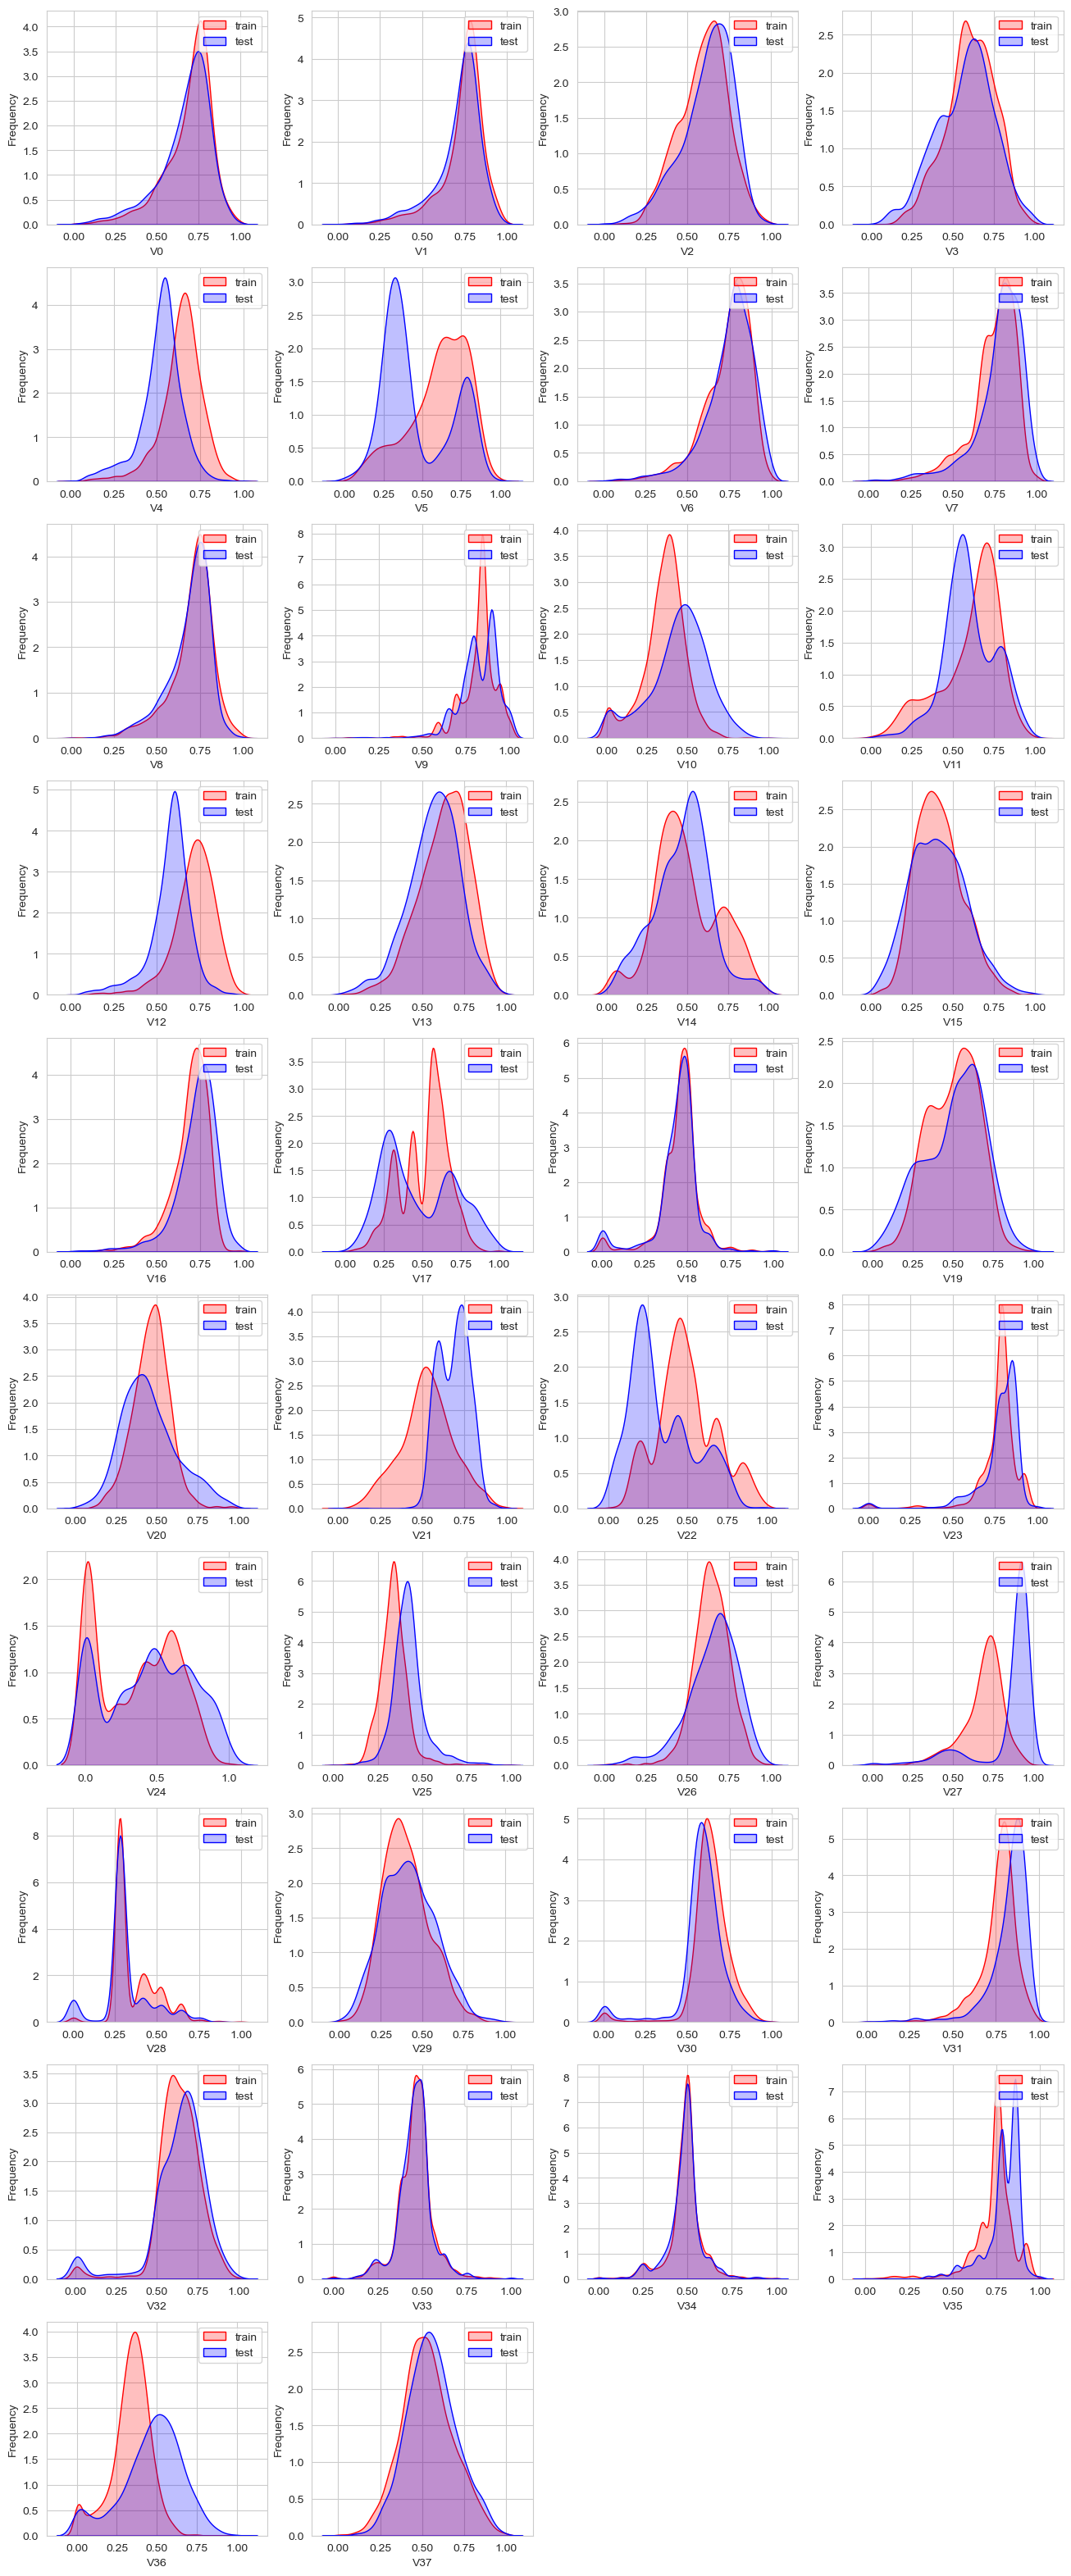

In [11]:
kde_col = 4
kde_row = 10

plt.figure(figsize=(4*kde_col, 4*kde_row))
i = 0
for col in test_data_scaler.columns:
    i += 1
    ax = plt.subplot(kde_row, kde_col, i)
    ax = sns.kdeplot(train_data_scaler[col], color='Red', fill=True)
    ax = sns.kdeplot(test_data_scaler[col], color='Blue', fill=True)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax = ax.legend(['train', 'test'])
plt.show()

In [12]:
# drop out V5, V9, V17, V27
train_data_scaler = train_data_scaler.drop(['V5', 'V9', 'V17', 'V27'], axis=1)
test_data_scaler = test_data_scaler.drop(['V5', 'V9', 'V17', 'V27'], axis=1)
train_data_scaler

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V11,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.759139,0.729830,0.524488,0.680337,0.698964,0.427136,0.385874,0.613522,0.221743,0.618202,...,0.406834,0.641467,0.666159,0.679280,0.000000,0.000000,0.074074,0.000000,0.018401,0.175
1,0.821406,0.789631,0.557939,0.705130,0.664244,0.465152,0.385874,0.724232,0.373887,0.586132,...,0.371596,0.643552,0.748349,0.721619,0.374950,0.499949,0.755580,0.289702,0.437406,0.676
2,0.828377,0.808239,0.584987,0.674567,0.653210,0.495905,0.385874,0.733458,0.466415,0.673673,...,0.387480,0.676487,0.779472,0.610577,0.374950,0.499949,0.755580,0.429901,0.458673,0.633
3,0.785006,0.779830,0.592670,0.642601,0.718746,0.521712,0.425208,0.734467,0.350013,0.706826,...,0.390683,0.684269,0.779726,0.722084,0.374950,0.477220,0.755580,0.374841,0.530618,0.206
4,0.777416,0.818182,0.588988,0.649462,0.683488,0.541338,0.425208,0.721638,0.314675,0.808234,...,0.413107,0.776126,0.785950,0.693393,0.374950,0.462067,0.755580,0.296712,0.543288,0.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,0.700898,0.724006,0.525288,0.641977,0.718880,0.824138,0.808498,0.672625,0.396412,0.670423,...,0.405766,0.597415,0.847053,0.601737,0.482957,0.481059,0.666667,0.405812,0.650980,0.892
2882,0.750000,0.806676,0.594750,0.645408,0.709460,0.822902,0.808498,0.753784,0.340302,0.691874,...,0.427523,0.586437,0.803354,0.580490,0.534086,0.534094,0.666667,0.254015,0.490196,0.812
2883,0.610440,0.625142,0.469750,0.629970,0.656439,0.808376,0.812805,0.558455,0.380901,0.746912,...,0.427523,0.601445,0.778328,0.714175,0.534086,0.534094,0.666667,0.453607,0.660332,0.235
2884,0.637546,0.687500,0.492318,0.609231,0.698560,0.793695,0.808355,0.590457,0.295252,0.679740,...,0.417512,0.773763,0.737805,0.787221,0.545482,0.545409,0.681506,0.294035,0.631222,1.042


## Feature correlation

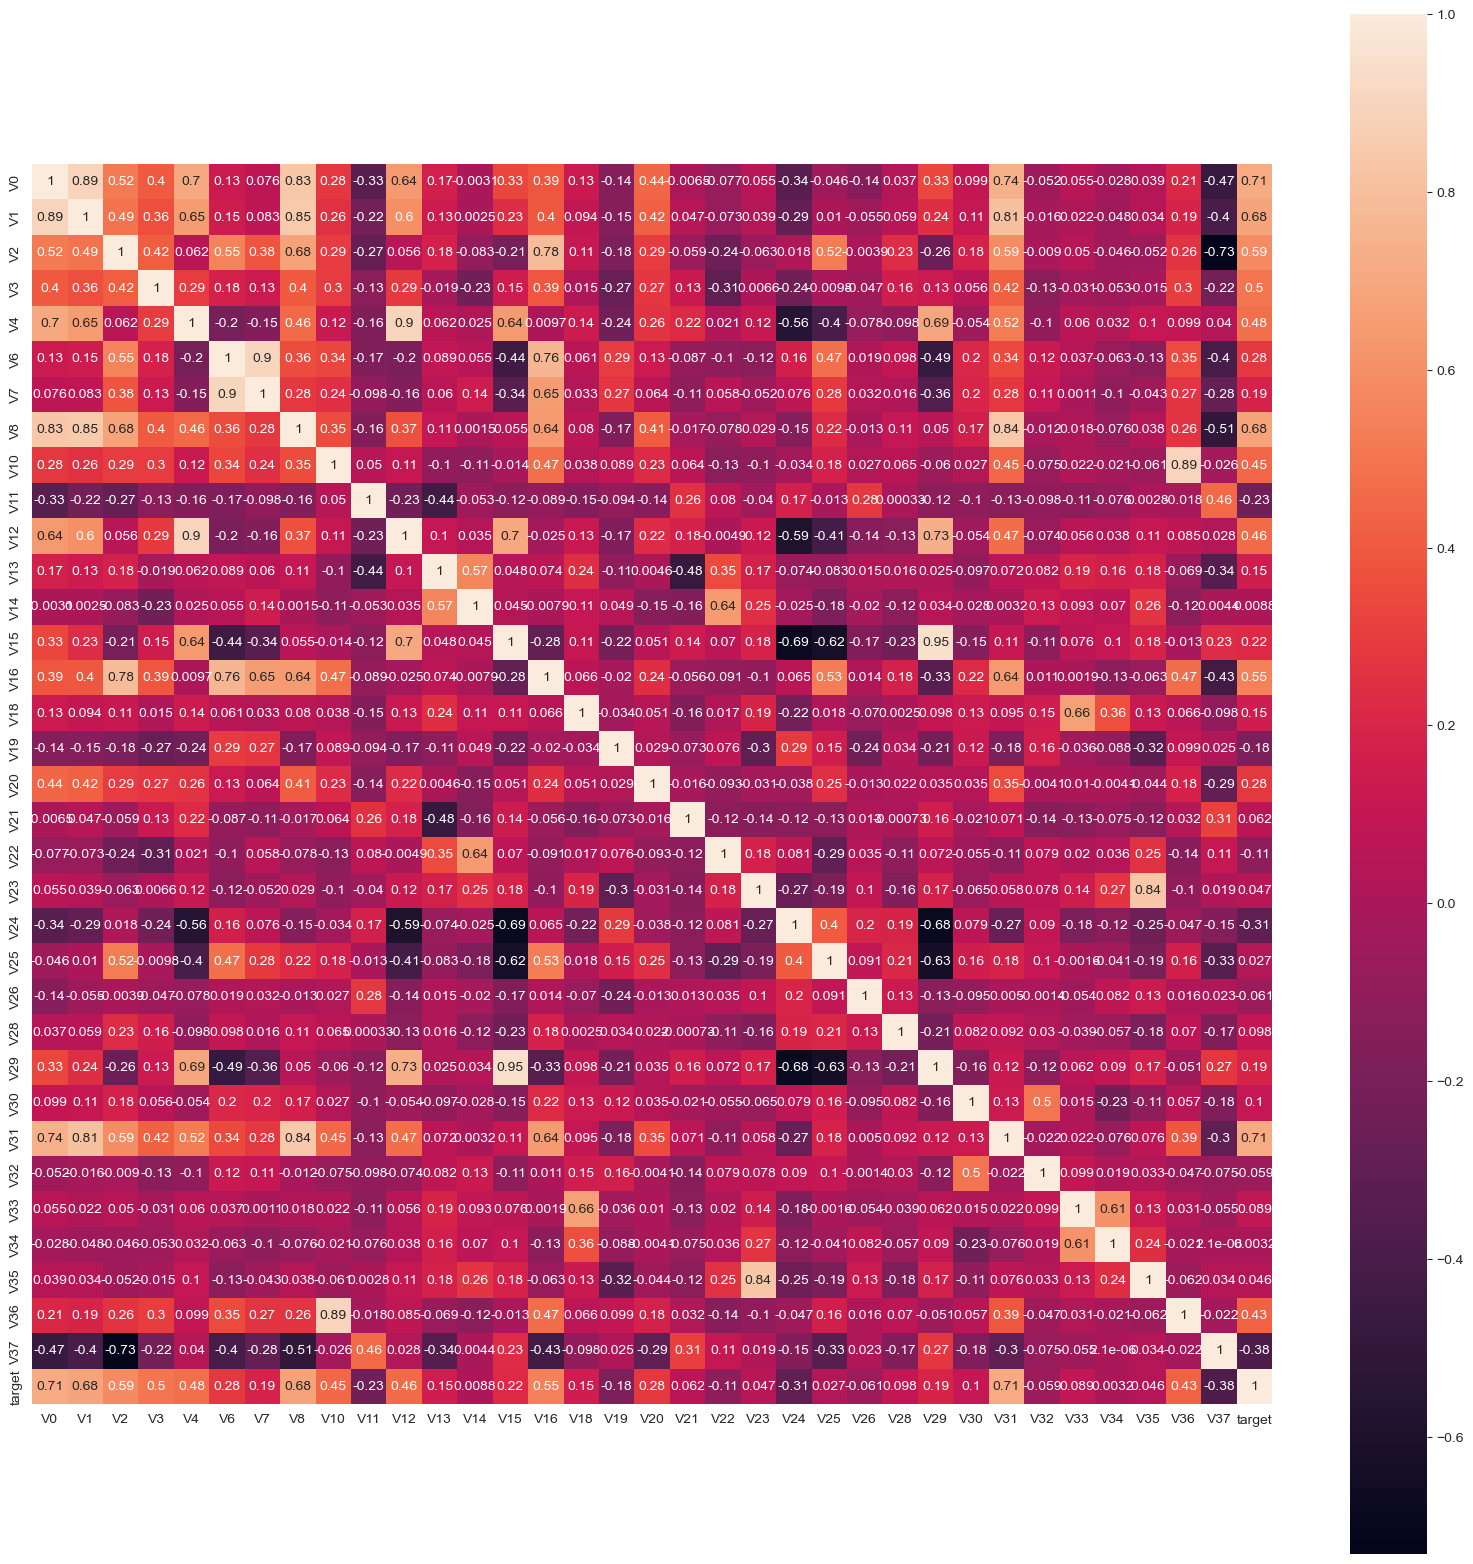

In [13]:
plt.figure(figsize=(20, 20))
column = train_data_scaler.columns.tolist()
mcorr = train_data_scaler[column].corr(method='spearman')

ax = sns.heatmap(mcorr, square=True, annot=True)

## PCA

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.9)
new_train_pca_90 = pca.fit_transform(train_data_scaler.iloc[:, 0:-1])
new_test_pca_90 = pca.fit_transform(test_data_scaler)

new_train_pca_90 = pd.DataFrame(new_train_pca_90)
new_test_pca_90 = pd.DataFrame(new_test_pca_90)

new_train_pca_90['target'] = train_data_scaler['target']

In [15]:
new_train_pca_90

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,target
0,0.242798,0.058964,0.176869,0.496235,0.626754,0.059408,-0.015122,0.396547,-0.090519,-0.480471,0.194094,-0.132476,-0.066400,0.049217,0.180792,0.175
1,0.073902,-0.006503,0.061873,0.311664,0.393972,-0.177787,0.107300,-0.173369,0.073778,-0.153872,-0.001135,0.008067,-0.012056,-0.097024,0.033854,0.676
2,0.083280,-0.079461,0.148929,0.156017,0.404436,-0.170208,0.059359,-0.230776,0.131310,-0.126769,-0.014103,0.062356,-0.001777,-0.187170,0.044461,0.633
3,0.185331,-0.094318,0.102106,0.167689,0.416341,-0.244110,-0.000122,-0.158549,0.126259,-0.140386,0.020667,0.034544,0.004532,-0.118271,-0.049724,0.206
4,0.138198,0.011573,0.243035,0.093668,0.314973,-0.304570,-0.088100,0.009156,0.056574,-0.086371,0.006908,0.031578,-0.078193,-0.191324,-0.045667,0.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,-0.213302,0.133867,0.152086,-0.148997,-0.228700,0.131013,-0.139952,-0.015004,-0.069770,0.036921,0.018232,0.078432,-0.034958,0.047969,0.082926,0.892
2882,-0.265257,0.109461,0.199003,-0.084902,-0.167138,0.065508,-0.160321,0.137993,-0.153522,0.202094,-0.006631,0.115014,-0.114079,0.039504,0.131809,0.812
2883,-0.066124,0.219141,0.140354,-0.100772,-0.389678,0.072027,-0.112697,-0.082160,0.017538,-0.002042,0.085969,0.075099,-0.053271,0.080223,0.071618,0.235
2884,-0.092358,0.239993,0.088397,0.014511,-0.391905,-0.023711,-0.236711,0.102382,-0.020656,0.047023,0.066187,0.020656,-0.108051,0.029154,0.005470,1.042


In [16]:
new_test_pca_90

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.101211,-0.325914,0.188371,-0.254312,0.133195,0.068185,-0.068378,-0.179990,-0.139263,0.014439,0.014075,0.016432,0.061585
1,0.051949,-0.336042,0.184384,-0.319973,0.212328,0.055138,0.042524,-0.124195,-0.093166,0.024510,-0.064879,0.044554,0.072923
2,0.018495,-0.317143,0.185504,-0.164284,0.273484,-0.094671,-0.021351,-0.110189,-0.067655,0.008758,-0.058053,0.029995,0.132276
3,-0.102962,0.039922,-0.009273,-0.215427,0.014010,-0.043712,0.039402,-0.160658,-0.261779,-0.084140,-0.004531,-0.058678,-0.020727
4,-0.199256,-0.012893,-0.105757,-0.146516,0.099588,0.052323,0.113236,-0.073263,-0.209384,-0.023030,-0.020691,0.020315,0.069398
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,1.591041,0.645104,0.230538,0.194613,-0.009793,0.387805,0.593563,0.341925,0.278672,0.261446,-0.285183,0.009462,0.355272
1921,1.594816,0.874191,0.299477,-0.419582,-0.056928,-0.188699,0.572871,0.319034,0.379554,0.013655,-0.211773,0.080571,0.118155
1922,1.226257,1.036212,0.039528,-0.398089,-0.070050,-0.257563,0.502221,0.372460,0.455172,-0.104455,-0.313824,-0.170808,-0.090903
1923,1.172004,1.008790,0.004357,-0.474260,0.027237,-0.303131,0.343504,0.226591,0.372553,-0.133300,-0.273402,-0.115269,-0.054882
